# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


In [3]:
data.dtypes

Year                 int64
Month                int64
Supplier            object
ItemCode            object
Description         object
ItemType            object
RetailSales        float64
RetailTransfers    float64
WarehouseSales     float64
dtype: object

In [4]:
data.isna().sum()

Year                0
Month               0
Supplier           24
ItemCode            0
Description         0
ItemType            1
RetailSales         0
RetailTransfers     0
WarehouseSales      0
dtype: int64

In [5]:
filt = data['ItemType'].isna()
data[filt]

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
66439,2017,10,REPUBLIC NATIONAL DISTRIBUTING CO,347939,FONTANAFREDDA BAROLO SILVER LABEL 750 ML,NaN,0.0,0.0,1.0


In [6]:
data.drop(index=66439, inplace=True)

## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

In [7]:
grp = data.groupby(by='ItemType').sum()

In [8]:
grp

,Year,Month,RetailSales,RetailTransfers,WarehouseSales
ItemType,,,,,
BEER,33132676,115830,209763.11,234924.44,2437617.32
DUNNAGE,64552,236,0.00,0.00,-45331.00
KEGS,7338694,27033,0.00,0.00,43558.00
LIQUOR,57282701,197353,309847.85,334176.41,33173.32
NON-ALCOHOL,1266826,4426,8109.97,9058.37,8656.72
REF,102879,385,281.34,171.92,-6754.00
STR_SUPPLIES,213823,774,995.98,3594.70,0.00
WINE,159514312,562617,313400.42,340710.51,433009.47


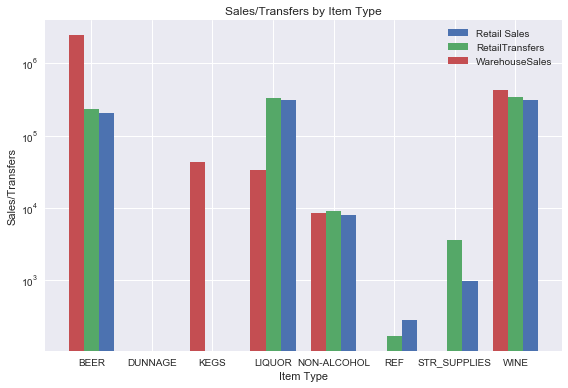

In [9]:
plt.style.use('seaborn')

grp = data.groupby(by='ItemType').sum()

retail_sales = grp['RetailSales']
retail_transfers = grp['RetailTransfers']
warehouse_sales = grp['WarehouseSales']
item_type = list(grp.index)

x_indexes = np.arange(len(item_type))
width = 0.25

fig, ax = plt.subplots()

ax.bar(x_indexes + width, retail_sales, width=width, label='Retail Sales')
ax.bar(x_indexes, retail_transfers, width=width, label='RetailTransfers')
ax.bar(x_indexes - width, warehouse_sales, width=width, label='WarehouseSales')

ax.set_title('Sales/Transfers by Item Type')
ax.set_xlabel('Item Type')
ax.set_ylabel('Sales/Transfers')

ax.set_xticks(x_indexes)
ax.set_xticklabels(item_type)

ax.set_yscale('log')

ax.legend()

plt.tight_layout()

plt.show()

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

In [10]:
grp = data.groupby(by='Supplier').sum()

In [11]:
grp['Total'] = grp['Month'] + grp['RetailSales'] + grp['RetailTransfers'] 

In [12]:
df = grp.sort_values(by='Total', ascending=False).head(10)
df

,Year,Month,RetailSales,RetailTransfers,WarehouseSales,Total
Supplier,,,,,,
E & J GALLO WINERY,9418283,32124,67455.63,75129.83,75594.99,174709.46
DIAGEO NORTH AMERICA INC,6723330,23122,57656.36,62968.12,54252.88,143746.48
CONSTELLATION BRANDS,5751015,19663,54472.51,60542.10,44968.76,134677.61
ANHEUSER BUSCH INC,4322888,15170,42559.14,47322.64,493856.19,105051.78
JIM BEAM BRANDS CO,5533195,18869,39156.79,43020.59,2928.45,101046.38
REPUBLIC NATIONAL DISTRIBUTING CO,19861377,70102,13010.15,13022.18,27863.19,96134.33
MILLER BREWING COMPANY,2602210,8980,35022.63,39176.67,572623.41,83179.30
A VINTNERS SELECTIONS,17581913,62637,8640.57,8361.10,29776.67,79638.67
BACARDI USA INC,3060091,10449,28034.63,30830.21,4050.48,69313.84


Text(0.5, 0, 'Sales')

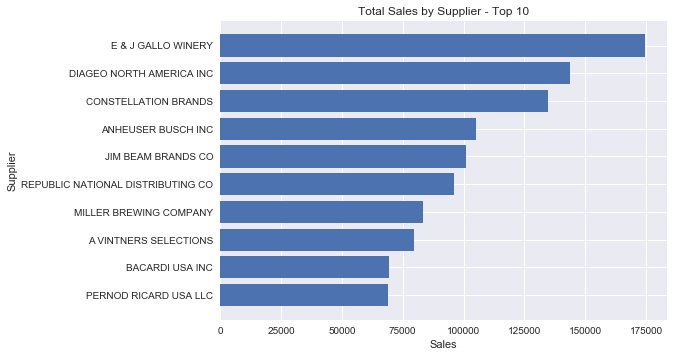

In [13]:
supplier = list(df.index)
total = list(df['Total'])

supplier.reverse()
total.reverse()

plt.barh(supplier, total)

plt.title('Total Sales by Supplier - Top 10')
plt.ylabel('Supplier')
plt.xlabel('Sales')

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

In [14]:
grp = data.groupby(by=['Year', 'Month']).sum()
grp

RetailSales  RetailTransfers  WarehouseSales
Year Month                                              
2017 4             0.00         81600.48            0.00
     5         94693.49         99845.70       367408.80
     6         97357.26         94720.00       379390.83
     8         87111.78         89486.43       382186.69
     9         90452.60         85934.38       305440.53
     10        89236.96         93035.97       303713.91
     11        98316.19        103230.96       339305.66
     12       131634.49        121129.51       306957.22
2018 1         75791.77         74396.14       254517.67
     2         77804.13         79256.78       265008.52

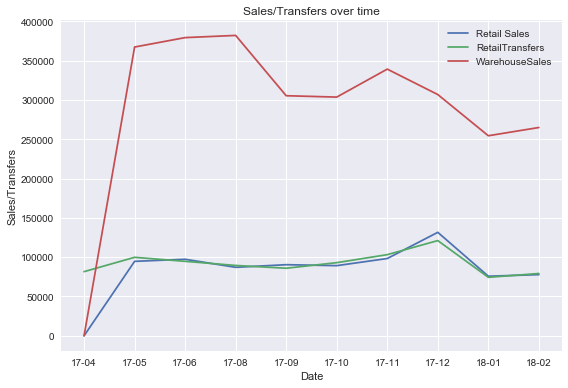

In [15]:
retail_sales = grp['RetailSales']
retail_transfers = grp['RetailTransfers']
warehouse_sales = grp['WarehouseSales']
date = ['17-04', '17-05', '17-06', '17-08', '17-09', '17-10', '17-11', '17-12', '18-01', '18-02']

x_indexes = np.arange(grp.shape[0])

fig, ax = plt.subplots()

ax.plot(x_indexes, retail_sales, label='Retail Sales')
ax.plot(x_indexes, retail_transfers, label='RetailTransfers')
ax.plot(x_indexes, warehouse_sales, label='WarehouseSales')

ax.set_title('Sales/Transfers over time')
ax.set_xlabel('Date')
ax.set_ylabel('Sales/Transfers')

ax.legend()

ax.set_xticks(x_indexes)
ax.set_xticklabels(date)

plt.tight_layout()

plt.show()

## 4. Plot the same information as above but as a bar chart.

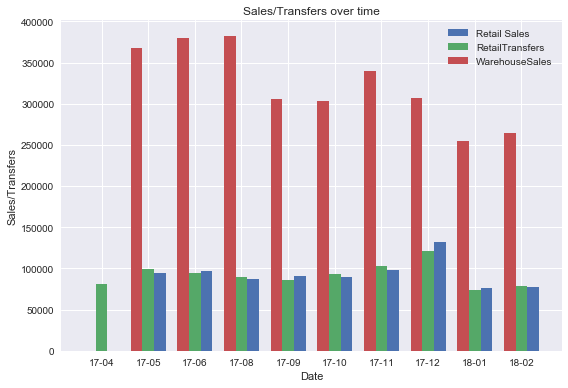

In [16]:
width = 0.25

fig, ax = plt.subplots()

ax.bar(x_indexes + width, retail_sales, width=width, label='Retail Sales')
ax.bar(x_indexes, retail_transfers, width=width, label='RetailTransfers')
ax.bar(x_indexes - width, warehouse_sales, width=width, label='WarehouseSales')

ax.set_title('Sales/Transfers over time')
ax.set_xlabel('Date')
ax.set_ylabel('Sales/Transfers')

ax.set_xticks(x_indexes)
ax.set_xticklabels(date)

ax.legend()

plt.tight_layout()

plt.show()

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

In [17]:
grp = data.groupby(['ItemType', 'Year', 'Month']).sum()
grp

RetailSales  RetailTransfers  WarehouseSales
ItemType Year Month                                              
BEER     2017 4             0.00         20045.00            0.00
              5         25023.24         27133.83       313046.66
              6         27863.26         28864.42       326192.94
              8         23030.13         25747.67       329371.89
              9         23852.76         21490.18       258320.23
...                          ...              ...             ...
WINE     2017 10        33108.76         34455.67        46424.54
              11        38275.92         39335.40        56940.81
              12        51492.76         48815.39        53945.66
         2018 1         29792.72         27073.47        41646.14
              2         29409.39         30973.35        44331.49

[73 rows x 3 columns]

In [18]:
grp.plot

In [19]:
df = grp.loc['BEER']

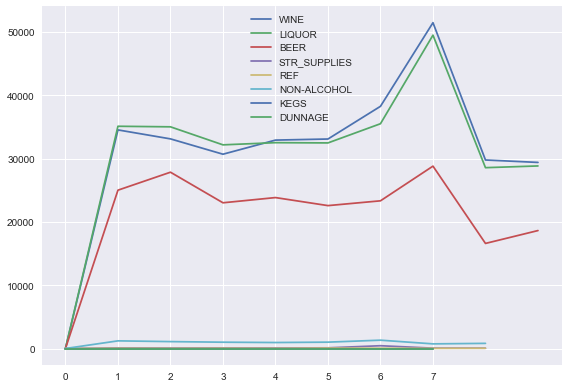

In [20]:
date = ['17-04', '17-05', '17-06', '17-08', '17-09', '17-10', '17-11', '17-12', '18-01', '18-02']



fig, ax = plt.subplots()

for item in data['ItemType'].unique():
    df = grp.loc[item]
    x_indexes = np.arange(df.shape[0])
    retail_sales = df['RetailSales']
    ax.plot(x_indexes, retail_sales, label=item)

#ax.set_title('Sales/Transfers over time')
#ax.set_xlabel('Date')
#ax.set_ylabel('Sales/Transfers')

ax.legend()

ax.set_xticks(x_indexes)
#ax.set_xticklabels(date)

plt.tight_layout()

plt.show()

In [21]:
date = ['17-04', '17-05', '17-06', '17-08', '17-09', '17-10', '17-11', '17-12', '18-01', '18-02']
x_indexes = np.arange(len(date))

In [22]:
# Don't really know how to conver back the x axis to dates
# I'm aware this is probabily not the most efficient way of doing th exercise but I will change the
# resolution after the bootcamp

## 6. Plot the same information as above but as a bar chart.

In [23]:
grp

RetailSales  RetailTransfers  WarehouseSales
ItemType Year Month                                              
BEER     2017 4             0.00         20045.00            0.00
              5         25023.24         27133.83       313046.66
              6         27863.26         28864.42       326192.94
              8         23030.13         25747.67       329371.89
              9         23852.76         21490.18       258320.23
...                          ...              ...             ...
WINE     2017 10        33108.76         34455.67        46424.54
              11        38275.92         39335.40        56940.81
              12        51492.76         48815.39        53945.66
         2018 1         29792.72         27073.47        41646.14
              2         29409.39         30973.35        44331.49

[73 rows x 3 columns]

In [24]:
# It's taking me a long time to figure this one out, I will try again after the bootcamp

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

In [28]:
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


In [29]:
data['ItemType'].unique()

array(['WINE', 'LIQUOR', 'BEER', 'STR_SUPPLIES', 'REF', 'NON-ALCOHOL',
       'KEGS', 'DUNNAGE'], dtype=object)

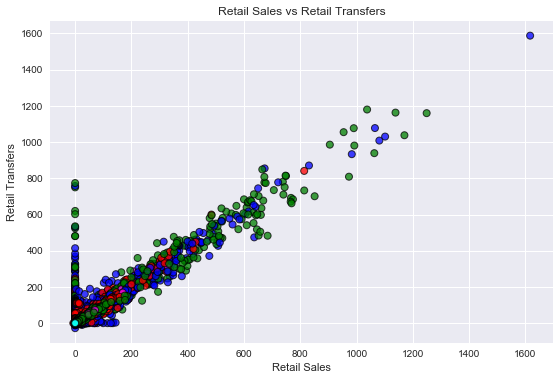

In [36]:
plt.style.use('seaborn')

retail_sales = data['RetailSales']
retail_transfers = data['RetailTransfers']
item_type = list(data['ItemType'])

colors = {'WINE':'red', 'LIQUOR':'blue', 
          'BEER':'green', 'STR_SUPPLIES':'black', 
          'REF': 'cyan', 'NON-ALCOHOL': 'magenta', 
          'KEGS': 'yellow', 'DUNNAGE': 'brown'}

plt.scatter(retail_sales, retail_transfers, c=data['ItemType'].apply(lambda x: colors[x]), edgecolor='black',
            linewidth=1, alpha=0.75)

plt.title('Retail Sales vs Retail Transfers')
plt.xlabel('Retail Sales')
plt.ylabel('Retail Transfers')

plt.tight_layout()

plt.show()

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x133c30650>,
      dtype=object)

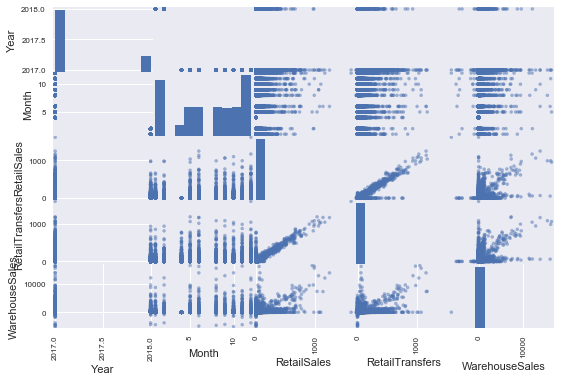

In [37]:
plt.style.use('seaborn')

pd.plotting.scatter_matrix(data)

plt.show()

In [33]:
# It's taking me a long time to figure this one out, I will try again after the bootcamp